In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from net import Net
from dataset import Dataset
%matplotlib inline

In [2]:
scale = 4
batch_size = 8
image_size = 100
data_root = "./data"
ckpt_path = "./checkpoint/sr_100.pth"

In [3]:
data  = Dataset(scale, train=False,
                data_root=data_root,
                size=image_size)
loader = DataLoader(data,
                    batch_size=batch_size,
                    num_workers=1,
                    shuffle=True)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Net(scale).to(device)

# load pre-trained model
state_dict = torch.load(ckpt_path)
net.load_state_dict(state_dict)

In [5]:
net.eval()
with torch.no_grad():
    for step, inputs in enumerate(loader):
        image_hr = inputs[0].to(device)
        image_lr = inputs[1].to(device)
                
        image_sr = net(image_lr)
        break # run only first batch

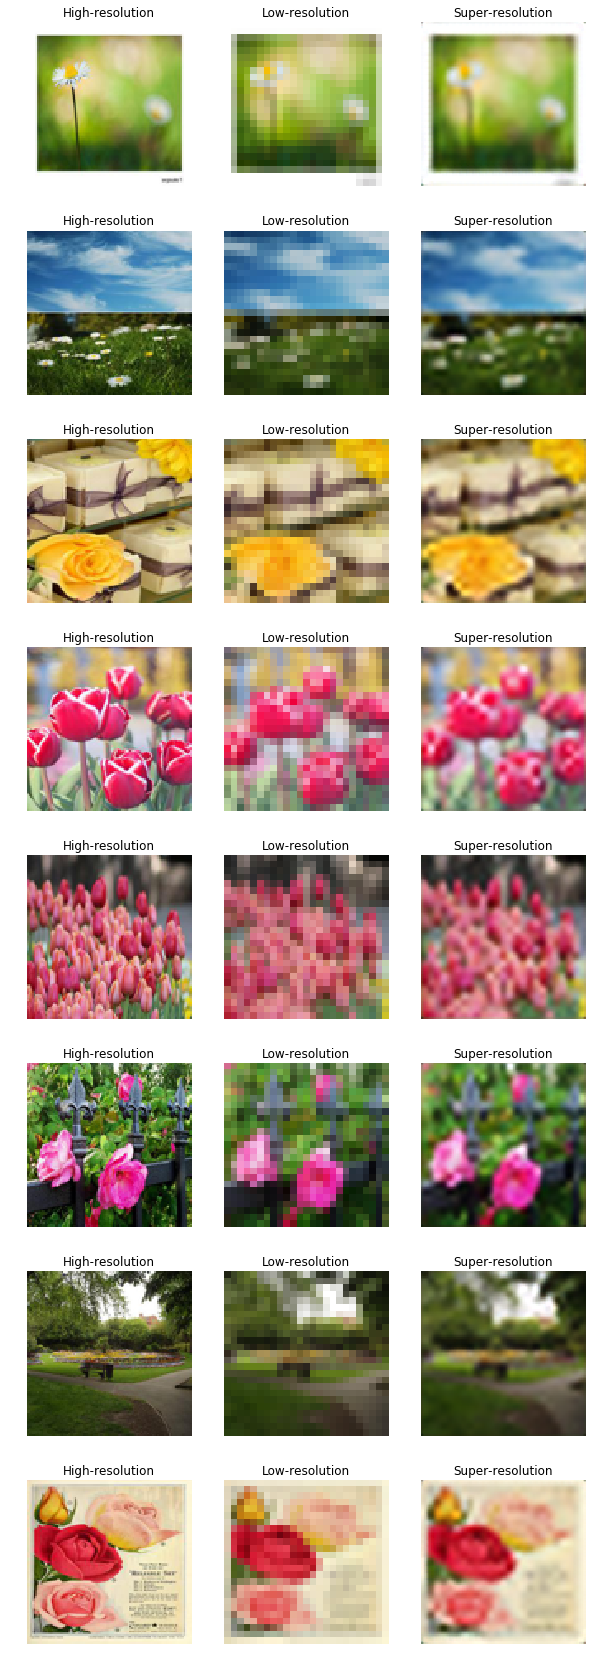

In [6]:
fig = plt.figure(figsize=(10, 30))

# visualize first batch
for i, (hr, lr, sr) in enumerate(zip(image_hr, image_lr, image_sr)):
    hr = hr.mul(255).clamp(0, 255).byte().permute(1, 2, 0).cpu().numpy()
    lr = lr.mul(255).clamp(0, 255).byte().permute(1, 2, 0).cpu().numpy()
    sr = sr.mul(255).clamp(0, 255).byte().permute(1, 2, 0).cpu().numpy()
    
    ax1 = fig.add_subplot(batch_size, 3, i*3+1)
    ax1.set_title("High-resolution")
    ax1.imshow(hr)
    ax1.axis("off")
    
    ax2 = fig.add_subplot(batch_size, 3, i*3+2)
    ax2.set_title("Low-resolution")
    ax2.imshow(lr)
    ax2.axis("off")
    
    ax3 = fig.add_subplot(batch_size, 3, i*3+3)
    ax3.set_title("Super-resolution")
    ax3.imshow(sr)
    ax3.axis("off")